In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df=pd.read_csv('D:\mla-z\P14-K-Means\K_Means\Mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
X=df.iloc[:,[3,4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Choosing the number of clusters using elbow method

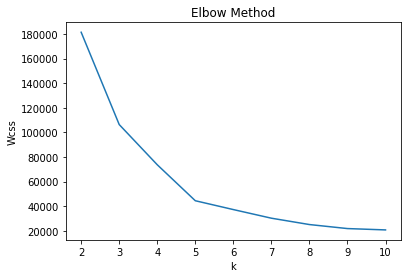

In [0]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(2,11):
    km=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(2,11),wcss) 
plt.xlabel('k')
plt.ylabel('Wcss')
plt.title('Elbow Method')
plt.show()

In [0]:
km=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [0]:
ymeans=km.labels_
ymeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [0]:
X['y']=ymeans
X.head()

c:\users\ashish\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Annual Income (k$),Spending Score (1-100),y
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


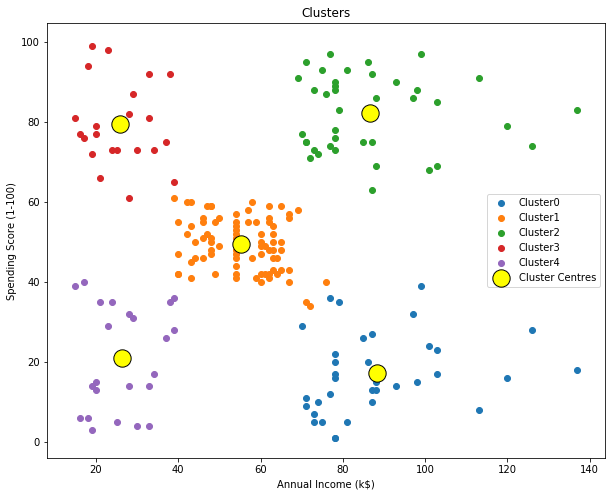

In [0]:
fig1=plt.figure(figsize=(10,8))
for i in range(0,5):
    plt.scatter(X[X['y']==i]['Annual Income (k$)'],X[X['y']==i]['Spending Score (1-100)'],label='Cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='o',s=300,color='yellow',edgecolors=['black'],label='Cluster Centres')
plt.legend() 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters')
fig1.savefig('kmeans_clustering.png',dpi=800)

In [0]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])